# Alumno: Gerardo de Miguel González

## Minería de Datos (Master en Data Science, UIMP-UC) 

## Profesores: Steven Van Vaerenbergh, Rodrigo G. Manzanas, Joaquín Bedia y Sixto Herrera

# Tarea 2. Problemas de Clasificación - Reducción de la Dimensión

En la presente tarea consideraremos el dataset `meteo.csv`, que podéis descargaros en el GitHub dedicado a este Máster ([meteo.csv](https://github.com/SantanderMetGroup/Master-Data-Science/blob/master/Data_mining/datasets/meteo.csv.)) y que ha sido utilizado en diferentes sesiones prácticas. Dicho dataset contiene en la primera columna el valor de precipitación observado en Lisboa en el periodo 1979-2008 mientras que en las restantes contiene los valores observados de diferentes variables atmosféricas en 40 puntos que cubren aproximadamente la Península Ibérica. Dichas variables serán los `predictores` del modelo mientras que la precipitación será nuestra variable objetivo. En particular los predictores son:

* Altura geopotencial en 500 hPa (columnas 2:41),
* Temperatura del aire en 850 hPa (columnas 42:81), 700 hPa (columnas 82:121) y 500 hPa (columnas 122:161), 
* Temperatura del aire en superficie (columnas 162:201),
* Humedad específica del aire en 850 hPa (columnas 202:241) y 500 hPa (columnas 242:281) y 
* Presión al nivel del mar (columnas 282:321)

Para establecer el problema de clasificación consideraremos dos umbrales de discretización, 1 mm y 20 mm, que definen la ocurrencia de precipitación (Wet days) y de precipitaciones intensas (Very heavy precipitation days), respectivamente. Puedes consultar más detalles de la definición en la web de [ECA&D](https://www.ecad.eu//indicesextremes/indicesdictionary.php).

Para el desarrollo de la tarea se permitirá el uso de todo el material incluido en el Moodle de las asignatura así como el desarrollado por el alumno durante la realización de las prácticas.

La entrega consisitirá de un notebook de Jupyter ó un R-MarkDown, junto con el archivo html que éste genera. Ambos ficheros se entregarán a través del Moodle de la asignatura en la tarea correspondiente.

## Punto 1 (3 puntos):

En esta primera parte de la tarea trataremos de ilustrar parte de los problemas reflejados en las sesiones teórico-prácticas planteando diferentes experimentos con el dataset `meteo.csv`.
En primer lugar, considerar el dataset completo incluyendo tanto las variables predictoras como la variable objetivo. 

### Dataset Completo

In [1]:
#::GMG::Obtengo el dataset del repositorio Github de Santander MetGroup (versión raw)
meteo <- read.csv(url(
    'https://raw.githubusercontent.com/SantanderMetGroup/Master-Data-Science/master/Data_mining/datasets/meteo.csv')
)

In [2]:
#::GMG::Descripción básica mínima del dataset
# https://rveryday.wordpress.com/2016/11/29/examine-a-data-frame-in-r-with-7-basic-functions/
dim(meteo)

[1] 10958   322

In [3]:
colnames(meteo)

[1] "X"    "y"    "X1"   "X2"   "X3"   "X4"   "X5"   "X6"   "X7"   "X8"  
 [11] "X9"   "X10"  "X11"  "X12"  "X13"  "X14"  "X15"  "X16"  "X17"  "X18" 
 [21] "X19"  "X20"  "X21"  "X22"  "X23"  "X24"  "X25"  "X26"  "X27"  "X28" 
 [31] "X29"  "X30"  "X31"  "X32"  "X33"  "X34"  "X35"  "X36"  "X37"  "X38" 
 [41] "X39"  "X40"  "X41"  "X42"  "X43"  "X44"  "X45"  "X46"  "X47"  "X48" 
 [51] "X49"  "X50"  "X51"  "X52"  "X53"  "X54"  "X55"  "X56"  "X57"  "X58" 
 [61] "X59"  "X60"  "X61"  "X62"  "X63"  "X64"  "X65"  "X66"  "X67"  "X68" 
 [71] "X69"  "X70"  "X71"  "X72"  "X73"  "X74"  "X75"  "X76"  "X77"  "X78" 
 [81] "X79"  "X80"  "X81"  "X82"  "X83"  "X84"  "X85"  "X86"  "X87"  "X88" 
 [91] "X89"  "X90"  "X91"  "X92"  "X93"  "X94"  "X95"  "X96"  "X97"  "X98" 
[101] "X99"  "X100" "X101" "X102" "X103" "X104" "X105" "X106" "X107" "X108"
[111] "X109" "X110" "X111" "X112" "X113" "X114" "X115" "X116" "X117" "X118"
[121] "X119" "X120" "X121" "X122" "X123" "X124" "X125" "X126" "X127" "X128"
[131] "X129" "X130" "X131" "X132" "X133" "X134" "X135" "X136" "X137" "X138"
[141] "X139" "X140" "X141" "X142" "X143" "X144" "X145" "X146" "X147" "X148"
[151] "X149" "X150" "X151" "X152" "X153" "X154" "X155" "X156" "X157" "X158"
[161] "X159" "X160" "X161" "X162" "X163" "X164" "X165" "X166" "X167" "X168"
[171] "X169" "X170" "X171" "X172" "X173" "X174" "X175" "X176" "X177" "X178"
[181] "X179" "X180" "X181" "X182" "X183" "X184" "X185" "X186" "X187" "X188"
[191] "X189" "X190" "X191" "X192" "X193" "X194" "X195" "X196" "X197" "X198"
[201] "X199" "X200" "X201" "X202" "X203" "X204" "X205" "X206" "X207" "X208"
[211] "X209" "X210" "X211" "X212" "X213" "X214" "X215" "X216" "X217" "X218"
[221] "X219" "X220" "X221" "X222" "X223" "X224" "X225" "X226" "X227" "X228"
[231] "X229" "X230" "X231" "X232" "X233" "X234" "X235" "X236" "X237" "X238"
[241] "X239" "X240" "X241" "X242" "X243" "X244" "X245" "X246" "X247" "X248"
[251] "X249" "X250" "X251" "X252" "X253" "X254" "X255" "X256" "X257" "X258"
[261] "X259" "X260" "X261" "X262" "X263" "X264" "X265" "X266" "X267" "X268"
[271] "X269" "X270" "X271" "X272" "X273" "X274" "X275" "X276" "X277" "X278"
[281] "X279" "X280" "X281" "X282" "X283" "X284" "X285" "X286" "X287" "X288"
[291] "X289" "X290" "X291" "X292" "X293" "X294" "X295" "X296" "X297" "X298"
[301] "X299" "X300" "X301" "X302" "X303" "X304" "X305" "X306" "X307" "X308"
[311] "X309" "X310" "X311" "X312" "X313" "X314" "X315" "X316" "X317" "X318"
[321] "X319" "X320"

In [4]:
#::GMG::La variable X es un índice que NO necesitamos
str(meteo$X)

 int [1:10958] 1 2 3 4 5 6 7 8 9 10 ...


In [3]:
meteo$X <- NULL

In [6]:
#::GMG::Veo si hay 'missing values'
# https://stackoverflow.com/questions/42079756/testing-for-missing-values-in-r
# https://stackoverflow.com/questions/24027605/determine-the-number-of-na-values-in-a-column
sum(is.na(meteo))

[1] 0

In [7]:
#::GMG::Tengo el dataset completo (y + Xn ...)
head(x = meteo,n = 5)

y,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320
10.9,57042.96,56534.84,55884.40,55175.59,54458.21,56980.27,56460.59,55800.02,55051.15,⋯,101985.9,101627.3,101357.2,101110.7,101291.0,101814.9,101479.4,101164.5,100970.7,100905.3
0.6,56963.20,56493.45,55930.82,55340.20,54768.63,56856.57,56361.95,55776.76,55164.26,⋯,102048.1,102069.7,102204.5,102480.3,102858.8,101973.3,102033.3,102165.5,102323.9,102534.2
13.0,56522.59,55971.40,55304.34,54498.03,53725.15,56514.84,55977.71,55327.28,54569.78,⋯,102399.1,102448.4,102438.3,102434.3,102339.8,102669.7,102565.5,102530.3,102453.6,102487.1
0.0,54627.98,53979.80,53494.05,53072.98,52616.36,54776.17,54089.05,53516.98,53012.86,⋯,100970.0,100672.8,100360.7,100133.7,100028.4,101126.2,100700.0,100381.3,100118.3,100319.8
0.0,53584.38,53391.01,53310.38,53292.82,53340.13,53781.70,53498.13,53306.82,53213.26,⋯,100652.7,100663.5,100747.7,100934.0,101015.8,100801.6,100685.3,100777.5,100909.4,101164.7


### PCA

Por un lado, calculad las componentes principales con y sin estandarización (`Nota:` consultar la ayuda de la función scale -> `? scale`):

`Nota 1:` en principio es posible trabajar con el dataset completo sin seleccionar un subconjunto pero si surge algún problema de memoria podéis considerar únicamente los primeros 10 años (~3650 filas).

`Nota 2:` usad las herramientas gráficas vistas durante la práctica para ilustrar los resultados y las conclusiones obtenidas.

**::GMG::** Aquí estamos usando el dataset completo con 320 características (*features*) y la variable de precipitación (*response*). PCA es una técnica que se encuadra dentro del aprendizaje no supervisado (*unsupervised learning*), Chaper 10, pp. 373 (1), por lo que lo que  parece que en realidad habría que excluir **y** el dataset y aplicar la técnica en las 320 características del mismo.

> Principal component analysis (PCA) refers to the process by which principal components are computed, and the subsequent use of these components in understanding the data. PCA is an unsupervised approach, since it involves only a set of features $X_1, X_2, ... , X_p$, and no associated response Y.

pp. 375 (1)

- (1) G. James et al., [An Introduction to Statistical Learning: with Applications in R,
Springer Texts in Statistics](http://www-bcf.usc.edu/~gareth/ISL/), DOI 10.1007/978-1-4614-7138-7 10, © Springer Science+Business Media New York 2013.

**::DUDA::** No le veo el sentido a aplicarlo al dataset completo (?)

#### Sin Estandarización

In [8]:
#::GMG::Componentes principales sin estandarización
# https://www.rdocumentation.org/packages/stats/versions/3.5.2/topics/prcomp
pca_full_ns <- prcomp(meteo, center = F, scale. = F)

In [9]:
#::GMG::Qué es lo que nos devuelve la función prcomp()
# https://www.rdocumentation.org/packages/stats/versions/3.5.2/topics/prcomp
names(pca_full_ns)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [10]:
#::GMG::Detalles de los componentes del objeto
str(pca_full_ns)

List of 5
 $ sdev    : num [1:321] 735142 5956 2139 1764 953 ...
 $ rotation: num [1:321, 1:321] -2.68e-06 -7.68e-02 -7.66e-02 -7.64e-02 -7.61e-02 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:321] "y" "X1" "X2" "X3" ...
  .. ..$ : chr [1:321] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : logi FALSE
 $ scale   : logi FALSE
 $ x       : num [1:10958, 1:321] -732849 -735023 -732768 -720715 -722778 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:321] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [11]:
#::GMG::Descipción
# https://www.rdocumentation.org/packages/stats/versions/3.5.2/topics/prcomp
# sdev : the standard deviations of the principal components 
#        (the square roots of the eigenvalues)
head(pca_full_ns$sdev, n = 5)

[1] 735141.8237   5955.6982   2139.4331   1764.2568    952.8071

In [12]:
#::GMG::Descipción
# https://www.rdocumentation.org/packages/stats/versions/3.5.2/topics/prcomp
# rotation : the matrix of variable loadings (columns are eigenvectors)
#::nota:: 
dim(pca_full_ns$rotation)
#::GMG::Vemos las tres primeras PC's con sus primeros 25 componentes de sus eigenvectors ...
head(pca_full_ns$rotation[,1:3],n = 25)

[1] 321 321

,PC1,PC2,PC3
y,-2.684716e-06,-0.0001886918,-0.0009897637
X1,-7.684453e-02,0.1010646209,0.0776125757
X2,-7.661460e-02,0.1068251384,0.1421700213
X3,-7.637951e-02,0.1108133817,0.2044587993
X4,-7.612812e-02,0.1121129705,0.2579488300
X5,-7.584893e-02,0.1100942639,0.2968685174
X6,-7.684080e-02,0.1123274633,0.0430893174
X7,-7.659804e-02,0.1187033236,0.1026272120
X8,-7.635437e-02,0.1228686495,0.1617827354
X9,-7.609918e-02,0.1239788418,0.2133231757


In [13]:
#::GMG::Descipción
# https://www.rdocumentation.org/packages/stats/versions/3.5.2/topics/prcomp
# center, scale : the centering and scaling used, or FALSE
head(pca_full_ns$center)

[1] FALSE

In [14]:
#::GMG::Descipción
# https://www.rdocumentation.org/packages/stats/versions/3.5.2/topics/prcomp
# center, scale : the centering and scaling used, or FALSE
head(pca_full_ns$scale)

[1] FALSE

In [15]:
#::GMG::Descripción
# the matrix x has the principal component score vectors
dim(pca_full_ns$x)
head(pca_full_ns$x)

[1] 10958   321

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC312,PC313,PC314,PC315,PC316,PC317,PC318,PC319,PC320,PC321
-732849.3,-4318.727,-566.6576,-5253.545,198.99395,1370.0623,-265.2671,-324.062897,-71.57965,194.5624,⋯,6.627001e-05,-1.878125e-05,-1.764898e-05,-3.934216e-05,-3.902992e-05,1.264160e-05,-2.885566e-05,1.105663e-05,1.821435e-05,8.069013e-06
-735023.1,-7079.299,1098.5472,-3325.102,92.26792,3034.3218,1388.6505,190.772714,-223.46657,708.2366,⋯,-1.187805e-05,-2.095601e-05,-4.402077e-06,-1.237993e-05,-1.061986e-05,6.017403e-06,-2.103580e-05,9.716846e-06,-2.041931e-06,1.970142e-05
-732768.3,-5706.424,-2636.0316,-2243.940,-2690.01957,2628.1781,1002.8926,839.668765,29.28938,320.8326,⋯,4.440990e-05,-4.409904e-05,7.215691e-06,-3.846457e-06,6.539126e-05,3.124744e-05,-3.418006e-05,9.313150e-06,-3.964534e-05,2.475620e-05
-720715.5,-8569.298,-4127.9983,-2710.049,-82.28401,517.8777,-732.9244,283.690618,-95.38063,-103.4086,⋯,-6.376249e-06,-2.741973e-05,1.168093e-05,2.341700e-06,-9.952860e-06,-1.243537e-05,-7.493491e-06,-5.165990e-06,1.656943e-05,-7.477284e-06
-722777.8,-9319.085,-2987.5988,1229.049,2130.26408,872.3628,-357.3961,-64.669783,285.64995,280.1793,⋯,-2.592606e-05,1.523078e-05,-8.202729e-05,-2.898765e-05,-4.466733e-05,-5.227296e-05,-8.718317e-06,-1.157515e-05,-2.431129e-05,1.720853e-05
-731180.5,-6607.198,-807.1356,3341.545,2540.07633,1399.1549,-167.5435,5.246512,270.17790,481.1771,⋯,9.571874e-06,-8.869726e-06,2.418042e-05,-8.827042e-06,1.831745e-05,8.237644e-06,1.721096e-05,1.086608e-05,2.732263e-06,-1.211056e-06


**::GMG::** Si dibujamos las varianzas de cada uno de los componentes principales (total y aculumativa) vemos que la PC1 domina absolutamente, *explica prácticamente toda la varianza del dataset*. Como no hemos estandarizado las variables lo que ha pasado es que PC1 incluye una serie de variables con muy alta variabilidad debido a su escala.

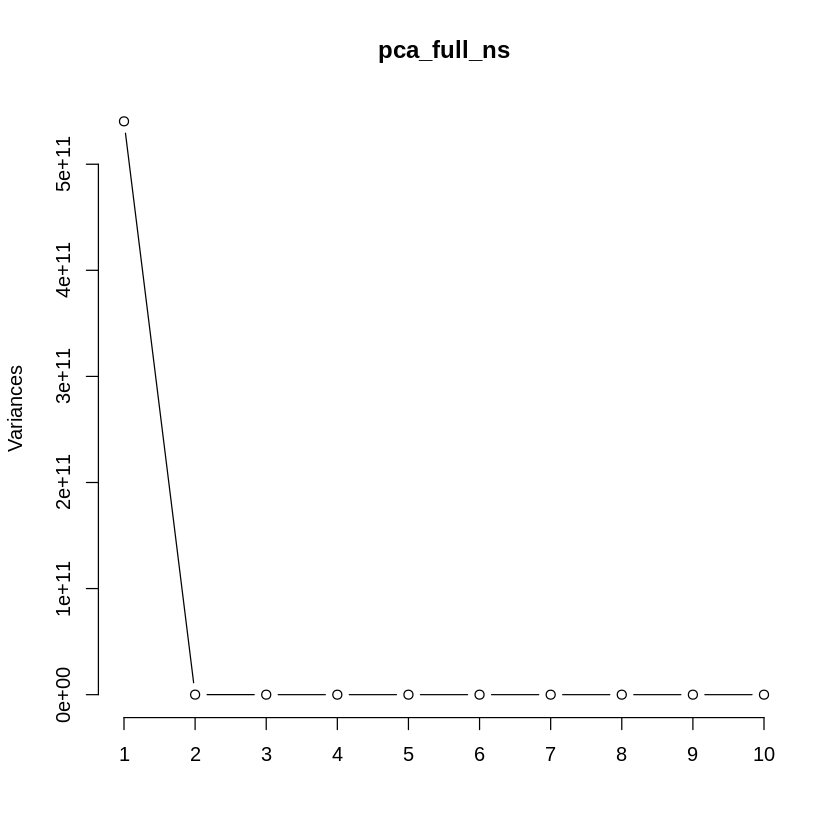

In [16]:
#::GMG::Directamente con el objeto que nos devuelve prcomp() sin poercentaje
plot(pca_full_ns, type='l')

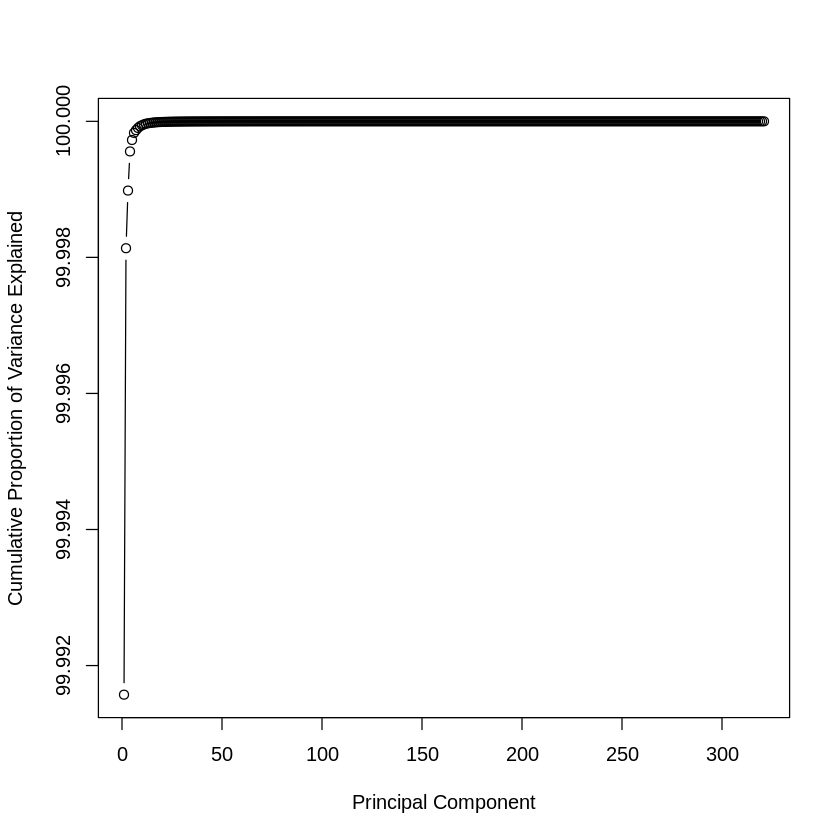

In [17]:
#::GMG:: cumulative scree plot
plot(100*cumsum(pca_full_ns$sdev^2)/sum(pca_full_ns$sdev^2), 
            xlab = "Principal Component",
            ylab = "Cumulative Proportion of Variance Explained",
            type = "b")

#### Con estandarización

In [18]:
#::GMG::Lo hacemos con scale
pca_full_scaled <- prcomp(meteo, center = TRUE, scale. = TRUE)

In [19]:
names(pca_full_scaled)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [20]:
str(pca_full_scaled)

List of 5
 $ sdev    : num [1:321] 13.65 7.13 3.54 3 2.78 ...
 $ rotation: num [1:321, 1:321] -0.0103 0.0574 0.0557 0.0536 0.0509 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:321] "y" "X1" "X2" "X3" ...
  .. ..$ : chr [1:321] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:321] 1.99 56484.48 56314.62 56141.12 55955.86 ...
  ..- attr(*, "names")= chr [1:321] "y" "X1" "X2" "X3" ...
 $ scale   : Named num [1:321] 6.26 1070.29 1123.64 1174.56 1226.69 ...
  ..- attr(*, "names")= chr [1:321] "y" "X1" "X2" "X3" ...
 $ x       : num [1:10958, 1:321] -8.29 -15.14 -11.26 -15.86 -19.4 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:321] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [21]:
head(pca_full_scaled$sdev)

[1] 13.650925  7.131345  3.543784  2.995060  2.784428  2.650215

In [22]:
dim(pca_full_scaled$rotation)
head(pca_full_scaled$rotation)

[1] 321 321

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC312,PC313,PC314,PC315,PC316,PC317,PC318,PC319,PC320,PC321
y,-0.01033838,0.03849341,0.063976303,-0.02371934,0.01274300,-0.089003828,0.015827878,-0.08354051,0.083537382,-0.01778078,⋯,-4.729933e-05,-3.586429e-06,-5.421114e-05,-3.477941e-05,-1.218937e-05,-4.448995e-05,-1.308973e-05,-1.105378e-05,-0.0000255699,-5.018065e-06
X1,0.05741723,-0.06124949,-0.005933929,0.10392750,0.04251490,0.056079291,-0.004045930,-0.04908806,-0.007101369,0.05911935,⋯,2.788780e-02,3.269164e-02,-9.317482e-02,3.786250e-02,-8.984456e-03,4.454105e-02,-8.224384e-03,-2.944805e-02,-0.0361412105,1.063532e-02
X2,0.05566149,-0.07349070,-0.011546292,0.10445281,0.01738126,0.043284569,-0.001861425,-0.01937142,-0.011437089,0.05527825,⋯,-5.394215e-02,-6.509444e-02,1.870743e-01,2.660271e-02,6.746467e-03,-3.386666e-02,2.996944e-02,7.728480e-02,0.0724556732,-3.214959e-02
X3,0.05359281,-0.08256940,-0.019270958,0.09493344,-0.01637802,0.026674655,0.001144030,0.01701864,-0.020998379,0.04705129,⋯,6.744204e-02,1.046257e-01,-1.602999e-01,-7.749776e-02,6.811432e-03,-5.471465e-02,-3.931964e-02,-1.222248e-01,-0.0491785387,5.180364e-02
X4,0.05088586,-0.08731191,-0.028954925,0.07690739,-0.05450316,0.009885426,0.003652367,0.05396004,-0.035089192,0.03634028,⋯,-8.592195e-02,-1.923949e-01,2.902058e-02,1.436260e-02,-9.890413e-03,5.363753e-02,2.400315e-02,1.254055e-01,-0.0153489384,-5.217143e-02
X5,0.04737046,-0.08697689,-0.039806800,0.05395598,-0.09182473,-0.005060131,0.004280090,0.08445480,-0.051318770,0.02471588,⋯,5.631979e-02,1.263348e-01,4.463851e-02,-5.328996e-02,7.140425e-03,3.423115e-02,-3.465617e-03,-7.010727e-02,0.0392660931,2.686016e-02


In [23]:
head(pca_full_scaled$center)

y           X1           X2           X3           X4           X5 
    1.988182 56484.475700 56314.622832 56141.115729 55955.864445 55750.474793

In [24]:
head(pca_full_scaled$scale)

y          X1          X2          X3          X4          X5 
   6.264967 1070.285041 1123.641093 1174.558209 1226.692318 1283.972940

**::GMG::** se puede ver aquí que la escala de **y** es mucho menor que las de las características (lo cual puede explicar su poco loading en el caso sin estandarizar)

In [25]:
dim(pca_full_scaled$x)
head(pca_full_scaled$x)

[1] 10958   321

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC312,PC313,PC314,PC315,PC316,PC317,PC318,PC319,PC320,PC321
-8.294542,1.7529006,3.4272835,4.9363043,1.26243566,1.9436556,-3.311523,-4.7020847,2.4189086,-0.4466268,⋯,-0.0022011886,-0.0038107516,0.0016705232,-0.0040015485,-0.0001974073,0.0034875217,-3.105494e-03,-0.0021721219,4.130096e-04,-1.128549e-05
-15.142910,-3.4703357,1.5209198,6.2259439,-3.43958450,0.9868435,-4.159894,-4.6768055,2.5596682,-2.6093652,⋯,0.0053505306,0.0001754836,0.0004034925,0.0028020316,-0.0005567413,0.0003017132,-6.549340e-04,-0.0006712971,-1.618094e-03,-9.309698e-05
-11.260958,-0.1316717,8.4162453,3.6117303,-0.19672861,-3.2010356,-1.898714,-2.4086650,4.4356878,-1.0901738,⋯,0.0022807238,0.0034662758,-0.0021533526,-0.0028494159,0.0011886535,-0.0002033106,3.584044e-03,-0.0023545258,-1.941394e-06,-6.455180e-05
-15.855907,15.5537104,-0.4502017,-0.3512601,1.77818839,-0.9934841,-3.464867,-2.2241348,1.9962999,1.7488825,⋯,0.0017318559,-0.0017079591,-0.0006261300,-0.0034205531,0.0004123261,-0.0026994394,7.681436e-04,-0.0002056876,4.566138e-04,-3.116398e-04
-19.399068,12.9406712,-1.1944702,-2.9755920,0.05083286,0.4304092,-4.449351,0.9822472,0.9387145,-1.0667325,⋯,-0.0002004088,0.0031071312,0.0007708471,-0.0009478624,0.0004890266,-0.0010008738,9.313774e-05,0.0003018010,-6.143089e-04,2.578705e-04
-15.557928,2.7584064,-1.1838834,-3.6058767,-2.70000825,1.8759788,-5.290855,1.8169393,0.3741114,-1.9965908,⋯,0.0009991501,-0.0038776726,0.0004274243,0.0018441023,0.0003471951,0.0006926932,2.418694e-03,0.0014030443,-6.352221e-04,9.353934e-04


**::GMG::** Aquí vemos que las ahora hay diferentes PC que aparecen tienen combinaciones lineales de variables normalizadas todas N(0,1) (*standarized*) y explican la variabilidad real de las combinaciones lineales dentro del dataset.

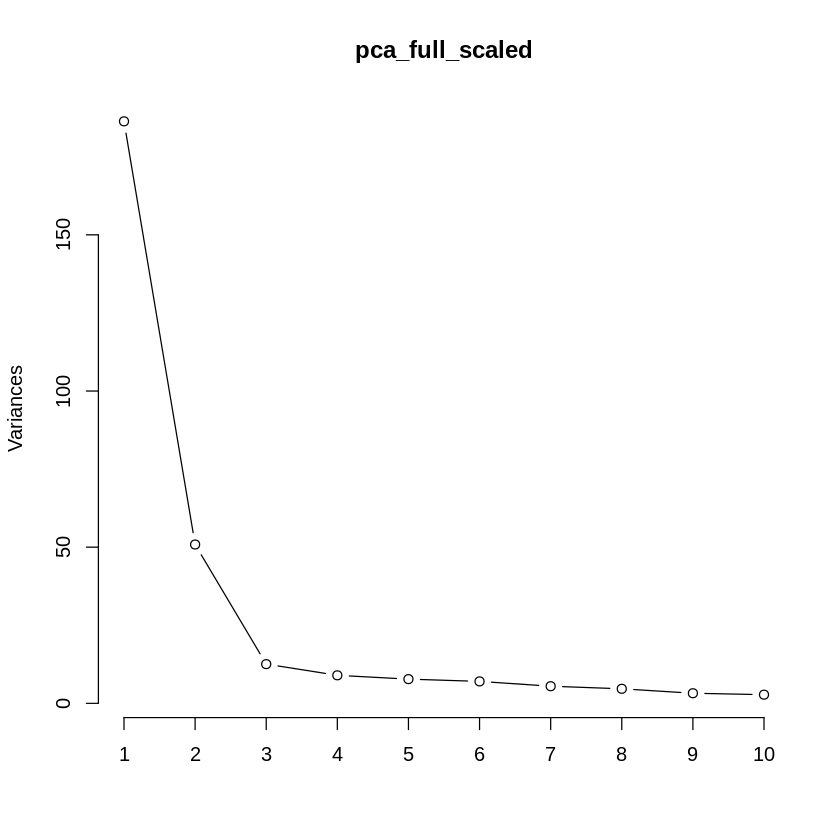

In [26]:
plot(pca_full_scaled, type='l')

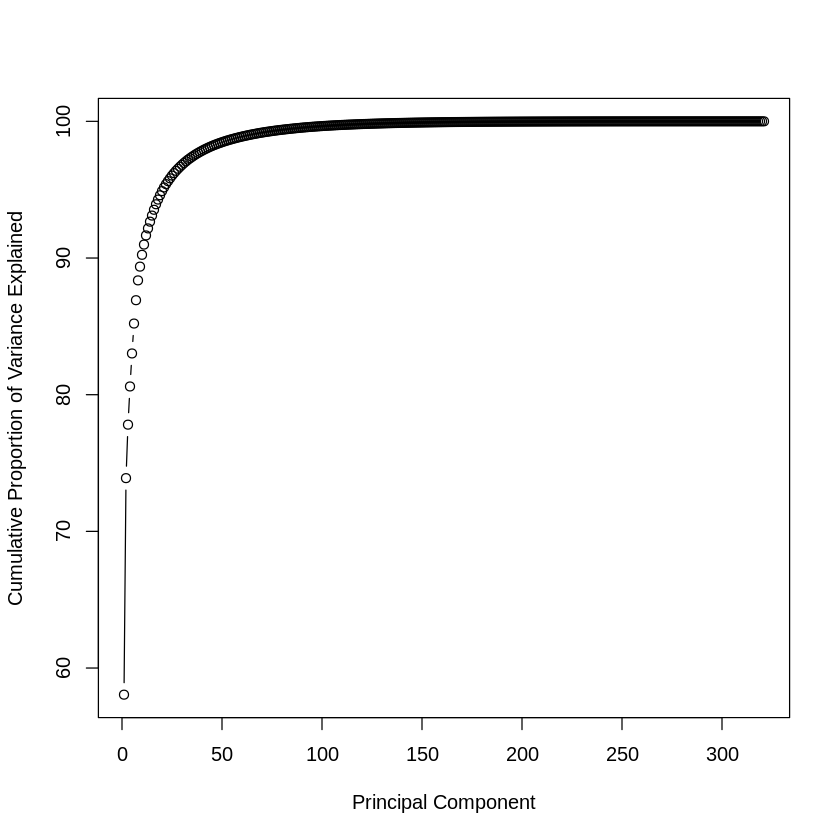

In [27]:
#::GMG:: cumulative scree plot
plot(100*cumsum(pca_full_scaled$sdev^2)/sum(pca_full_scaled$sdev^2), 
            xlab = "Principal Component",
            ylab = "Cumulative Proportion of Variance Explained",
            type = "b")

* ¿Cómo contribuye en cada caso la variable objetivo a la primera componente principal?

**::GMG::** La "contribución" de una característica (*feature*) a una componente principal se extrae del *loading vector* de la componente principal. En el caso de la PC1 tenemos dos vectores, uno para el caso sin estandarizar y otro para el caso estandarizado.

In [28]:
#::GMG::Esta es la "contribución" de y y X_i a la PC1 sin estandarizar
t(pca_full_ns$rotation[,1])

y,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320
-2.684716e-06,-0.07684453,-0.0766146,-0.07637951,-0.07612812,-0.07584893,-0.0768408,-0.07659804,-0.07635437,-0.07609918,⋯,-0.138434,-0.138366,-0.1383693,-0.1384473,-0.1385171,-0.1384371,-0.1383525,-0.1383503,-0.1383308,-0.1384048


In [29]:
#::GMG::Esta es la "contribución" de y y X_i a la PC1 estandarizando
t(pca_full_scaled$rotation[,1])

y,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320
-0.01033838,0.05741723,0.05566149,0.05359281,0.05088586,0.04737046,0.06062457,0.05912541,0.05715152,0.05443809,⋯,-0.008269296,-0.002012563,0.002044729,0.00452874,0.0003114627,-0.00561639,0.0001213253,0.004728206,0.003996039,0.002241745


**::GMG::** Para interpretar la aportación hay que hacer notar que los *loadings" tienen la restricción de que la suma de sus cuadrados da 1.

In [30]:
#::GMG::Para comparar
#       Sin estándarizar: la feature que aporta más a PC1, i.e. tiene el loading más alto 
#       (en valor absoluto)
paste(which.max(abs(pca_full_ns$rotation[-1,1])), ' -- ',
      abs(pca_full_ns$rotation[which.max(abs(pca_full_ns$rotation[,1])),1])
     )

[1] "299  --  0.138612349268337"

In [31]:
#::GMG::Para comparar
#       Estandarizando: la feature que aporta más a PC1, i.e. tiene el loading más alto 
#       (en valor absoluto)
paste(which.max(abs(pca_full_scaled$rotation[-1,1])), ' -- ',
      abs(pca_full_scaled$rotation[which.max(abs(pca_full_scaled$rotation[,1])),1])
     )

[1] "103  --  0.0699745353149145"

**::GMG::** En este caso la diferencia enre "contribuciones" no es tan grande como en el caso sin estandarizar. Esto significa que al estandarizar tenemos que la aportación a la primera componente principal de y es significativa.

* ¿A qué componente principal contribuye principalmente la variable objetivo? ¿qué porcentaje de varianza se explica hasta dicha componente?

**::GMG::** Ahora tenemos que ver la contribución (componente de loading) de y a lo largo de todas las componentes principales que hemos obtenido.

In [32]:
#::GMG::Caso sin estandarizar
t(pca_full_ns$rotation[1,])

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC312,PC313,PC314,PC315,PC316,PC317,PC318,PC319,PC320,PC321
-2.684716e-06,-0.0001886918,-0.0009897637,4.462896e-05,-0.001370433,0.001222185,-0.000186068,0.0007164657,-0.002114419,0.001635352,⋯,3.948372e-08,9.82247e-08,2.443286e-08,5.725554e-08,1.272105e-07,6.837465e-08,1.099774e-07,1.497431e-07,8.459199e-08,3.039821e-08


In [33]:
#::GMG::Para ver qué componente principal tiene en mayor loading de y
paste(which.max(abs(t(pca_full_ns$rotation[1,]))), ' -- ',
      abs(pca_full_ns$rotation[1,which.max(abs(pca_full_ns$rotation[1,]))]))

[1] "74  --  0.81288070396197"

In [34]:
#::GMG::La varianza explicada hasta la PC74 en el caso no estandarizado
100*cumsum(
    pca_full_scaled$sdev^2/sum(pca_full_scaled$sdev^2)
    )[which.max(abs(t(pca_full_ns$rotation[1,])))]

[1] 99.26735

In [35]:
#::GMG::Caso estandarizado
t(pca_full_scaled$rotation[1,])

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC312,PC313,PC314,PC315,PC316,PC317,PC318,PC319,PC320,PC321
-0.01033838,0.03849341,0.0639763,-0.02371934,0.012743,-0.08900383,0.01582788,-0.08354051,0.08353738,-0.01778078,⋯,-4.729933e-05,-3.586429e-06,-5.421114e-05,-3.477941e-05,-1.218937e-05,-4.448995e-05,-1.308973e-05,-1.105378e-05,-2.55699e-05,-5.018065e-06


In [36]:
#::GMG::Para ver qué componente principal tiene en mayor loading de y
paste(which.max(abs(t(pca_full_scaled$rotation[1,]))),' -- ',
      abs(pca_full_scaled$rotation[1,which.max(abs(pca_full_scaled$rotation[1,]))]))

[1] "23  --  0.552827322741536"

In [37]:
#::GMG::La varianza explicada hasta la PC23 en el caso estandarizado
100*cumsum(
    pca_full_scaled$sdev^2/sum(pca_full_scaled$sdev^2)
    )[which.max(abs(t(pca_full_scaled$rotation[1,])))]

[1] 95.62509

**::DUDA::** No entiendo el sentido de estos cálculos

* En base a los puntos anteriores, ¿puede considerarse en alguno de los casos que la variable objetivo se "eliminaría" del modelo debido a su contribución a cada una de las componentes principales?

**::GMG::** Las variables que se incluyen en las componentes primcipales no se "eliminan". Todas están presentes con diferentes "pesos" (*loadings*) en todas las PCs. Ciertas variables pueden tener pesos muy pequeños y el efecto podría ser de cierta "eliminación" en el sentido de que su contribución es despreciable. Esto ocurre con **y** en el caso no estandarizado en la PC1 pero su poca contribución se puede antribuir a su escala y variabilidad comparada con la de las otras variables. Es cierto que tiene una gran contribución en PC74 pero dado que jamás se elegiría esa PC ya que con la PC1 se tiene "suficiente" no lo tenemos en cuenta. 

En el caso estándarizado si tiene una contribución (*loading*) significativo en las PCs, especialmente en la 23, por lo que no se podría considerar "eliminada" sea cual sea la selección que se haga (más si se incluye la PC23, claro)

**::DUDA**:: No entiendo el sentido de esta pregunta. La variable y (*response*) se debería haber eliminado de entrada ya que estamos aplicando una técnica no supervisada y no tiene sentido incluir esa variable en el análisis de las características (*features*). Para hacer esto bien tendría que haberse usado la técnica supervisada **PLS** (*Partial Least Squares*), que no nos han explicado en clase.

_Referencias_

1. Quora: [What is the difference between PLS and PCA?] (https://www.quora.com/What-is-the-difference-between-PLS-and-PCA)
2. [Principle Component Analysis and Partial Least Squares: Two Dimension Reduction Techniques for Regression](https://www.casact.org/pubs/dpp/dpp08/08dpp76.pdf). Saikat Maitra and Jun Yan. Casualty Actuarial Society, 2008 Discussion Paper Program. 

### Distribución de variables en PC1

* ¿Cómo se distribuye la contribución de las diferentes variables del espacio original a la primera componente principal? En caso de no estandarizar, ¿puede inferirse alguna relación entre el rango de las variables y su contribución a la primera componente principal?

**::GMG::** Si pinto los biplots de PC1 y PC2 sin estandarización y con estandarización, se van a mostrar los loadings de las diferentes variables que se incluyen en las PCs. 

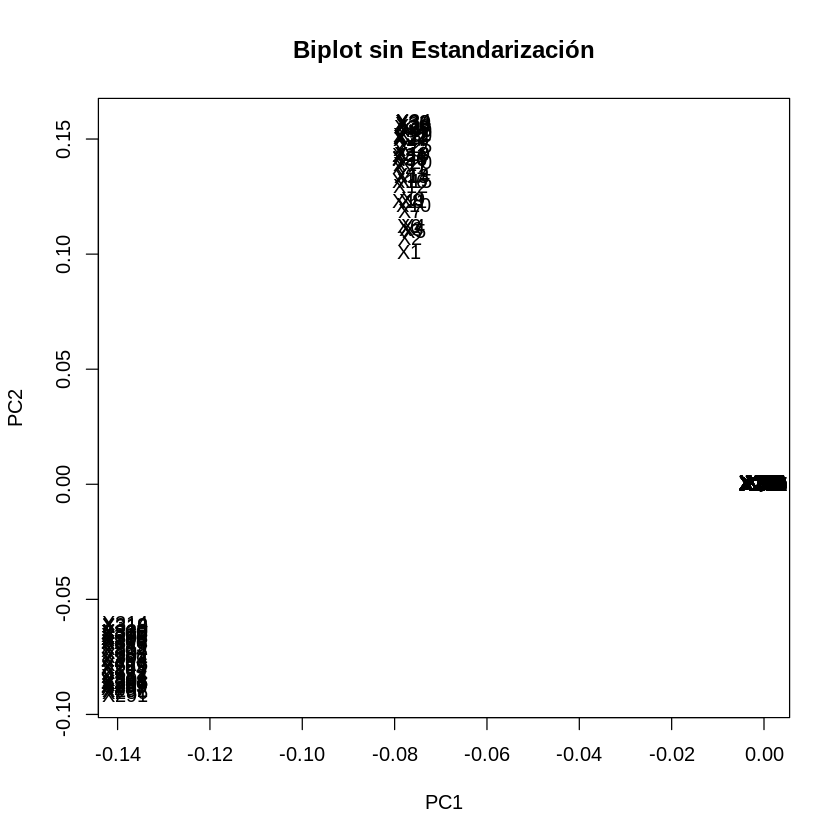

In [38]:
plot(pca_full_ns$rotation, cex = 0)
text(pca_full_ns$rotation, labels = labels(pca_full_ns$rotation)[[1]], cex = 1)
title("Biplot sin Estandarización")

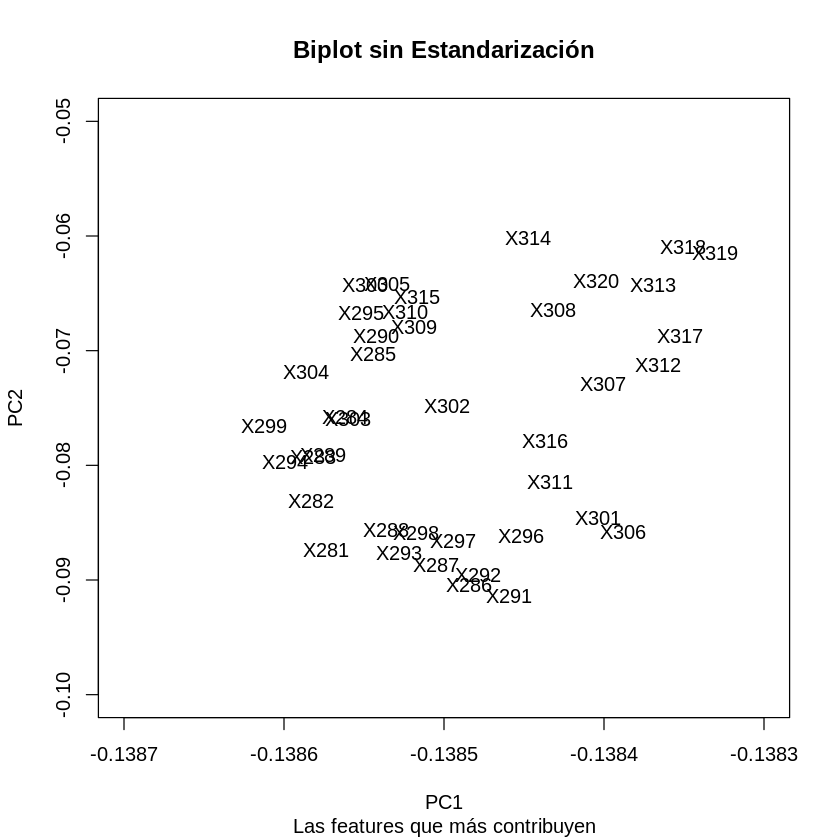

In [39]:
#::GMG::Hagfo un 'zoom' de las características que más contribuyen en PC1
plot(pca_full_ns$rotation, cex = 0, xlim = c(-0.1387, -0.1383), ylim = c(-0.10, -0.05))
text(pca_full_ns$rotation, labels = labels(pca_full_ns$rotation)[[1]], cex = 1)
title(main = 'Biplot sin Estandarización', sub = 'Las features que más contribuyen')

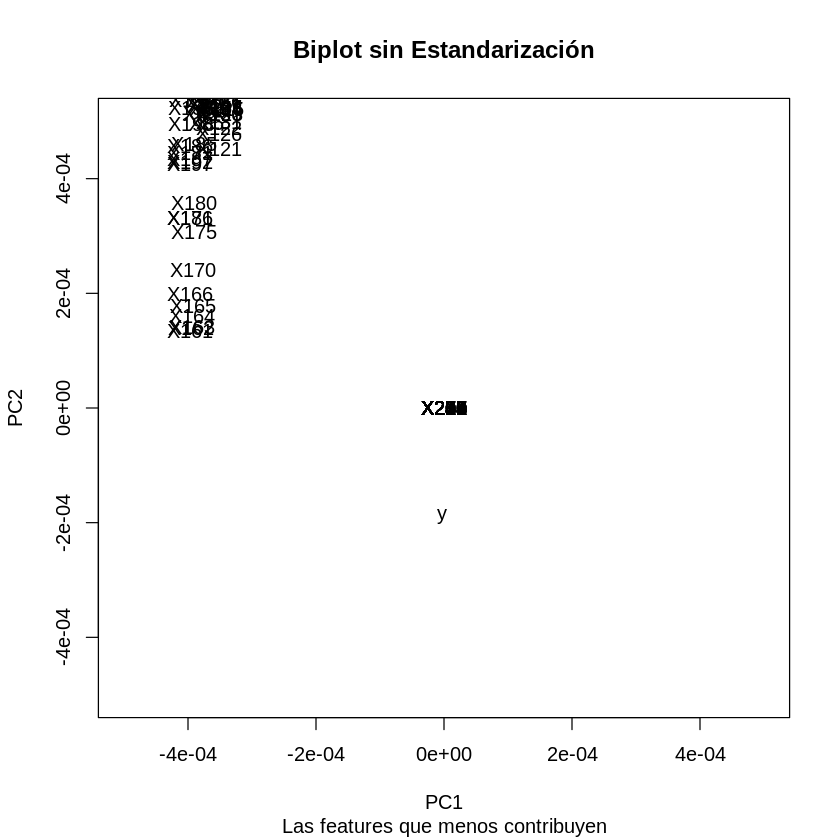

In [40]:
#::GMG::Hago un 'zoom' de las características que menos contrinuyen en PC1
plot(pca_full_ns$rotation, cex = 0, xlim = c(-5e-04, 5e-04), ylim = c(-5e-04, 5e-04))
text(pca_full_ns$rotation, labels = labels(pca_full_ns$rotation)[[1]], cex = 1)
title(main = 'Biplot sin Estandarización', sub = 'Las features que menos contribuyen')

**::GMG::** Aquí encontramos a **y**, entre las que menos aportan en PC1.

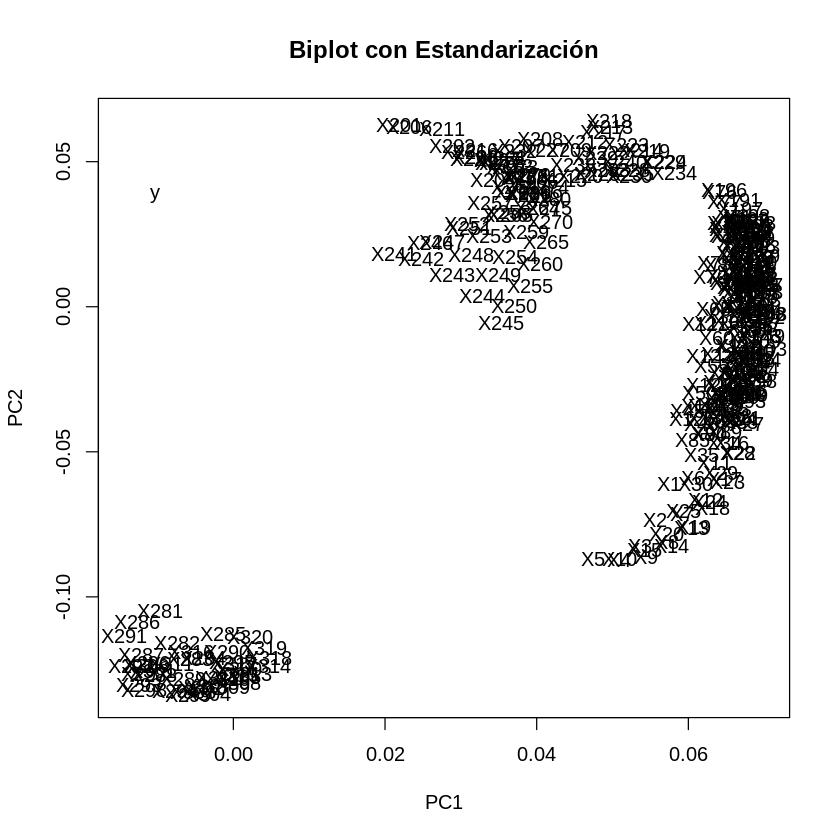

In [41]:
#::GMG::Visión general con estandarización
plot(pca_full_scaled$rotation, cex = 0)
text(pca_full_scaled$rotation, labels = labels(pca_full_scaled$rotation)[[1]], cex = 1)
title('Biplot con Estandarización')

In [42]:
#::GMG::¿Qué podemos decir de la variabilidad? 
#       Podemos hacernos una idea si miramos el center y scale
#       de una de las variables ... 
#       por ejemplo X299 aparece entre las que más aportan sin estandarización
paste('X299: Center =', pca_full_scaled$center[300], ', Scale =', pca_full_scaled$scale[300])

[1] "X299: Center = 101893.764234749 , Scale = 713.317875060793"

In [43]:
#::GMG:: ... y X170 está entre las que menos aportan sin estandarización
paste('X170: Center =', pca_full_scaled$center[171], ', Scale =', pca_full_scaled$scale[171])

[1] "X170: Center = 287.747126337515 , Scale = 3.12420732107883"

**::GMG:** En conclusión, al no estandarizar, las variables con mayor contribución a la PC1 son exactamente aquellas que tienen un orden de magnitud significativamente mayor que el resto en los datos originales.

### ::GMG:: Bonus: PCA sin y 

**::GMG::** La manera no supervisada de hacer el PCA en meteo (quitando la variable de precipitación)

In [44]:
#::GMG::Para hacer dotplots ...
#       https://www.statmethods.net/graphs/dot.html
library('lattice')

#### PCA estandarizado

In [4]:
#::GMG::Calculo las PCAs con estandarizado y las características X_i (sin y)
X_i <- meteo[,-1]
pca_x_scaled <- prcomp(X_i, center = TRUE, scale. = TRUE)

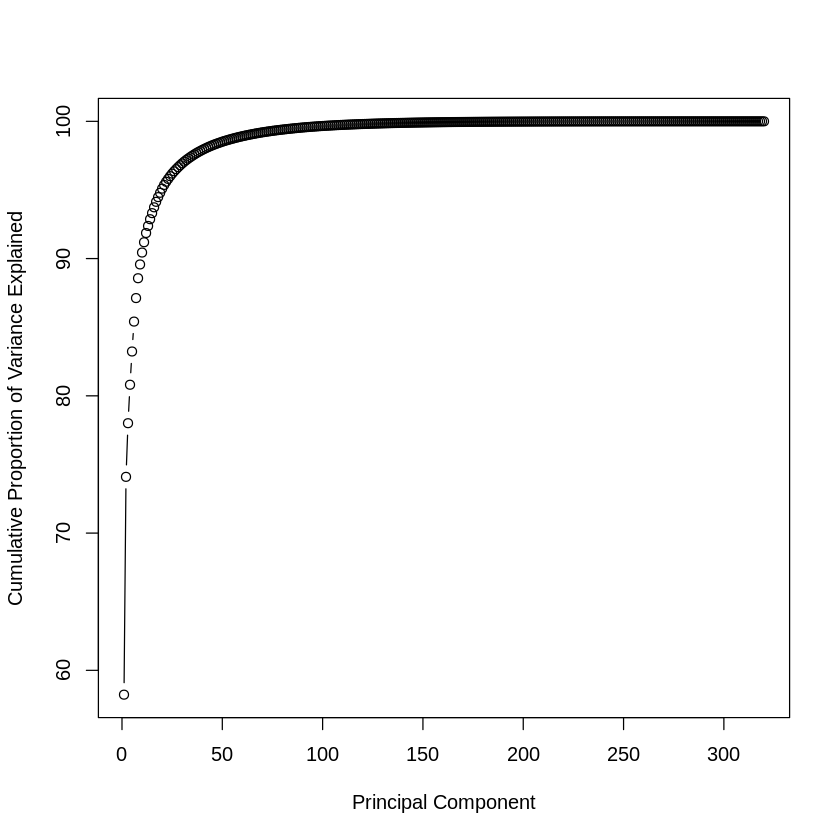

In [46]:
#::GMG:: cumulative scree plot
plot(100*cumsum(pca_x_scaled$sdev^2)/sum(pca_x_scaled$sdev^2), 
            xlab = "Principal Component",
            ylab = "Cumulative Proportion of Variance Explained",
            type = "b")

In [47]:
#::GMG::Cojo las PCs que explican el 80% de la varianza
var_exp <- 100*cumsum(pca_x_scaled$sdev^2/sum(pca_x_scaled$sdev^2))
paste('El número de PCs que explica el 80% de la varanza es ', max(which(var_exp <= 80)))

[1] "El número de PCs que explica el 80% de la varanza es  3"

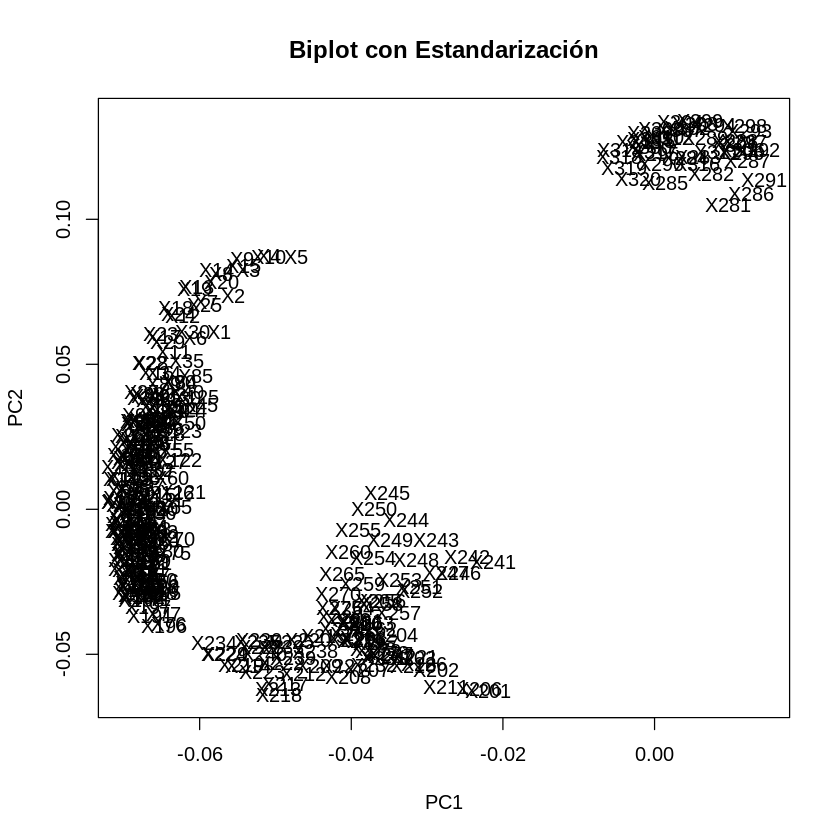

In [48]:
#::GMG::Visión general de los loadings para PC1 y PC2
plot(pca_x_scaled$rotation, cex = 0)
text(pca_x_scaled$rotation, 
     labels = labels(pca_x_scaled$rotation)[[1]], 
     cex = 1)
title('Biplot con Estandarización')

In [49]:
#::GMG::Visión general de los loadings para PC2 y PC3
#plot(pca_x_scaled$rotation[,c(2,3)], cex = 0)
#text(pca_x_scaled$rotation[,c(2,3)], 
#     labels = labels(pca_x_scaled$rotation[,c(2,3)])[[1]], 
#     cex = 1)
#title('Biplot con Estandarización')

In [50]:
#::GMG::Puesto que los loadings da una idea de la correlación de cada X_i con la PC_i
#       Puede ser útil ver las variables con los loadings en valor absoluto más altos
# ::nota::los que tienen los loadings más bajos serán "colineales" con la PC_i y no nos
#         van a interesar a la hora seleccionar X_i para posteriormente hacer una
#         clasificación, poe ejemplo :)
loadings <- pca_x_scaled$rotation
sorted_pc1 <- loadings[order(loadings[,1]),1]
sorted_pc2 <- loadings[order(loadings[,2]),2]
#sorted_pc3 <- loadings[order(loadings[,3]),3]

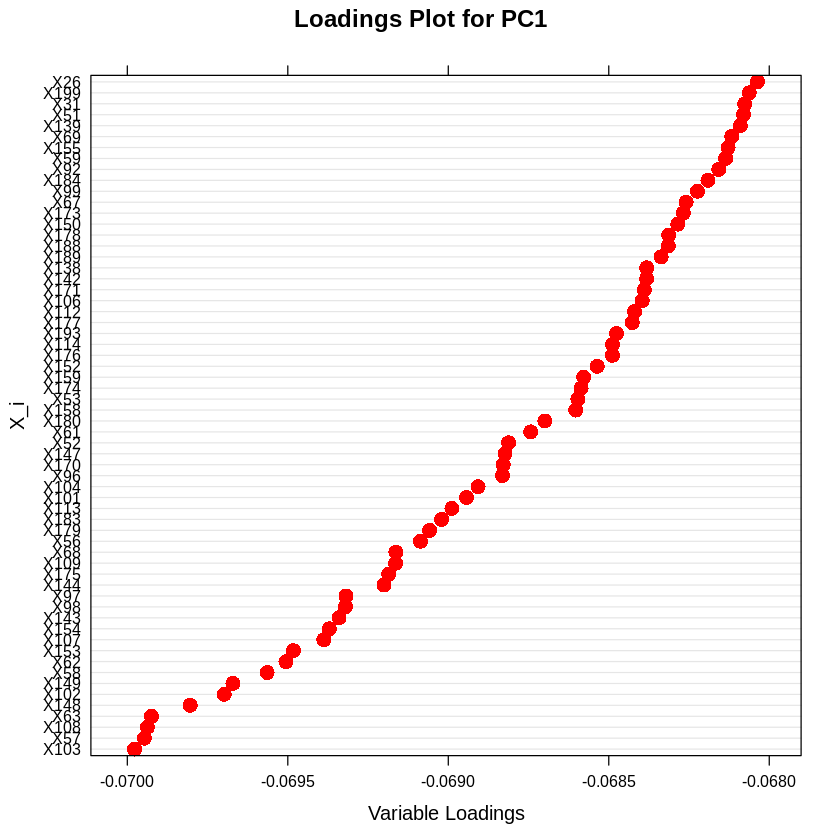

In [51]:
#::GMG::Para evitar el clutter defino un umbral de loading para ver las variables
#       'más dominantes' dentro de PC1
dotplot(x = sorted_pc1[which(sorted_pc1 < -0.068)], 
        main = 'Loadings Plot for PC1', 
        xlab = 'Variable Loadings', ylab = 'X_i',
        cex = 1.5, col = 'red')

In [52]:
paste('Tenemos las', 
      length(which(sorted_pc1 < -0.068)), 
      'variables más dominantes en PC1')

[1] "Tenemos las 62 variables más dominantes en PC1"

In [53]:
print(names(which(sorted_pc1 < -0.068)))

 [1] "X103" "X57"  "X108" "X63"  "X148" "X102" "X149" "X58"  "X62"  "X153"
[11] "X107" "X154" "X143" "X98"  "X97"  "X144" "X175" "X109" "X68"  "X56" 
[21] "X179" "X183" "X113" "X101" "X104" "X96"  "X170" "X147" "X52"  "X61" 
[31] "X180" "X158" "X53"  "X174" "X159" "X152" "X176" "X114" "X193" "X177"
[41] "X112" "X106" "X171" "X142" "X138" "X189" "X188" "X178" "X150" "X173"
[51] "X67"  "X99"  "X184" "X92"  "X59"  "X155" "X69"  "X139" "X51"  "X31" 
[61] "X199" "X26" 


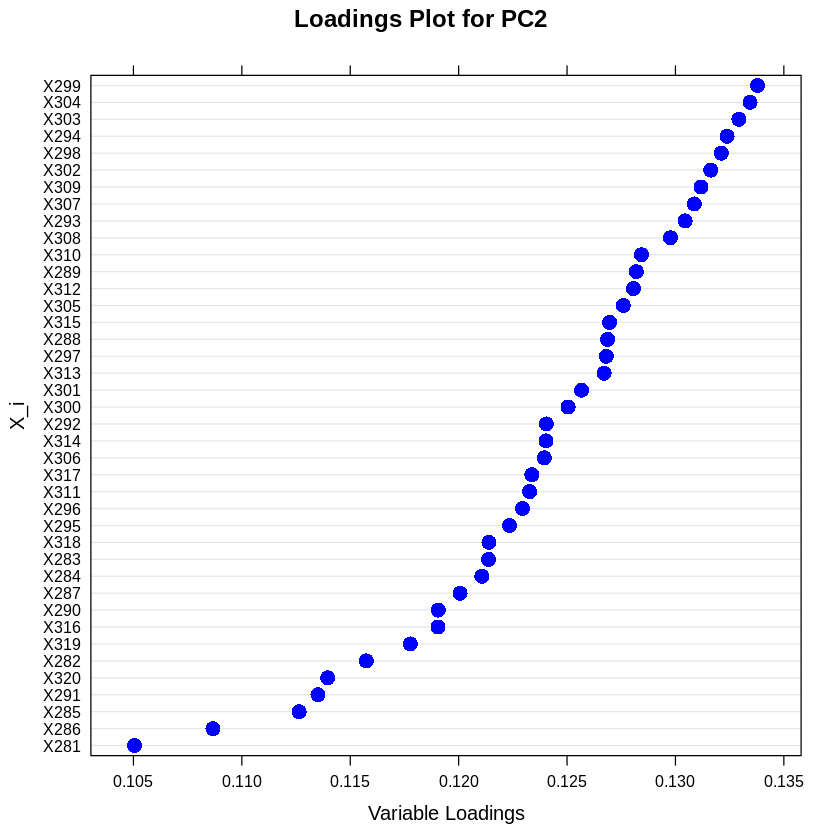

In [54]:
#::GMG::Se puede hacer lo mismo con PC2 ... etc, etc
#::GMG::Para evitar el clutter defino un umbral de loading para ver las variables
#       'más dominantes' dentro de PC1
dotplot(x = sorted_pc2[which(sorted_pc2 > 0.10)], 
        main = 'Loadings Plot for PC2', 
        xlab = 'Variable Loadings', ylab = 'X_i',
        cex = 1.5, col = 'blue')

In [55]:
paste('Tenemos las', 
      length(which(sorted_pc2 > 0.10)), 
      'variables más dominantes en PC2')

[1] "Tenemos las 40 variables más dominantes en PC2"

In [56]:
print(names(which(sorted_pc2 > 0.10)))

 [1] "X281" "X286" "X285" "X291" "X320" "X282" "X319" "X316" "X290" "X287"
[11] "X284" "X283" "X318" "X295" "X296" "X311" "X317" "X306" "X314" "X292"
[21] "X300" "X301" "X313" "X297" "X288" "X315" "X305" "X312" "X289" "X310"
[31] "X308" "X293" "X307" "X309" "X302" "X298" "X294" "X303" "X304" "X299"


**::DUDA::** Me pregunto si se puede hacer una selección de variables (*feature selection*) como la que pongo a continuación

In [57]:
#::GMG:: Se puede usar intersect() para hacer una selección (?)
# https://www.rdocumentation.org/packages/prob/versions/0.9-1/topics/union
# https://www.rdocumentation.org/packages/prob/versions/0.9-1/topics/intersect
# https://www.rdocumentation.org/packages/prob/versions/1.0-1/topics/setdiff
union(names(which(sorted_pc1 < -0.068)), 
      names(which(sorted_pc2 > 0.10))
     )

[1] "X103" "X57"  "X108" "X63"  "X148" "X102" "X149" "X58"  "X62"  "X153"
 [11] "X107" "X154" "X143" "X98"  "X97"  "X144" "X175" "X109" "X68"  "X56" 
 [21] "X179" "X183" "X113" "X101" "X104" "X96"  "X170" "X147" "X52"  "X61" 
 [31] "X180" "X158" "X53"  "X174" "X159" "X152" "X176" "X114" "X193" "X177"
 [41] "X112" "X106" "X171" "X142" "X138" "X189" "X188" "X178" "X150" "X173"
 [51] "X67"  "X99"  "X184" "X92"  "X59"  "X155" "X69"  "X139" "X51"  "X31" 
 [61] "X199" "X26"  "X281" "X286" "X285" "X291" "X320" "X282" "X319" "X316"
 [71] "X290" "X287" "X284" "X283" "X318" "X295" "X296" "X311" "X317" "X306"
 [81] "X314" "X292" "X300" "X301" "X313" "X297" "X288" "X315" "X305" "X312"
 [91] "X289" "X310" "X308" "X293" "X307" "X309" "X302" "X298" "X294" "X303"
[101] "X304" "X299"

## Punto 2 (3 puntos):

A continuación, consideraremos la serie de precipitación discretizada a partir del valor 1 mm, que es el estándar definido para establecer los días en que ha llovido.

### Ocurrencia de precipitación

In [58]:
#::GMG::Selecciono la serie de preciptaciones diarias
precip <- meteo$y
str(precip)

 num [1:10958] 10.9 0.6 13 0 0 1.2 1.1 0 0 0.7 ...


In [95]:
#::GMG::Calculo la ocurrencia de precipitación
#       binary occurrence as factor (discretizo + 'categorizo')
precip_f <- as.factor(ifelse(precip >= 1, 1, 0))
str(precip_f)

 Factor w/ 2 levels "0","1": 2 1 2 1 1 2 2 1 1 1 ...


Dividir la muestra en dos subconjuntos, el primero (20 primeros años) lo utilizaremos para calibrar el modelo y obtener su configuración óptima, mientras que el segundo (10 últimos años) lo utilizaremos como test independiente de cara a comparar diferentes métodos.

### Train/Test

In [60]:
#::GMG::Hayamos índices de train/test con 2/3 y 1/3, respectivamente
set.seed(1)
indtrain = sample(1:length(precip), round(length(precip)*2/3))  
indtest = setdiff(1:length(precip), indtrain)

El objetivo de este apartado es predecir la ocurrencia de precipitación en Lisboa a partir de los predictores antes definidos. Para ello consideraremos, por un lado, las componentes principales obtenidas estandarizando los datos originales y, por otro lado, el método `KNN`. 

* Considerad diferentes umbrales de varianza explicada y el número de PCs asociado (p.e. 40%, 60%, 80% y 90%) y obtened el valor óptimo de `K` en cada caso rastreando valores entre 1 y 15, ¿cómo cambia el valor óptimo? En base a los resultados obtenidos, ¿cuantas PCs considerarías para entrenar el modelo? (`Nota:` ver práctica de `KNN`)

### Umbrales

In [62]:
var_exp <- 100*cumsum(pca_x_scaled$sdev^2)/sum(pca_x_scaled$sdev^2)

**::GMG::** El caso de 40% sugerido por el enunciado no tiene sentido porque la PC1 ya explica más del 40% :)

In [63]:
#::GMG::Porcentaje de la varianza explicada por PC1
paste('La PC1 explica el', round(var_exp[1],2), '% de la varianza.')

[1] "La PC1 explica el 58.23 % de la varianza."

In [64]:
#::GMG::Calculo los umbrales
umbrales <- c(max(which(var_exp <= 60)),
              max(which(var_exp <= 80)),
              max(which(var_exp <= 90)))

In [65]:
paste('El número de PCs que explican el 60% de la varanza es ', umbrales[1])

[1] "El número de PCs que explican el 60% de la varanza es  1"

In [66]:
paste('El número de PCs que explican el 80% de la varanza es ', umbrales[2])

[1] "El número de PCs que explican el 80% de la varanza es  3"

In [67]:
paste('El número de PCs que explican el 90% de la varanza es ', umbrales[3])

[1] "El número de PCs que explican el 90% de la varanza es  9"

**::GMG::** Recordar que las variables PCs son variables *transformadas* (del tipo *feature extraction* que seguramente tienen un significado en el dominio de meteo y clima)

### Datasets

In [69]:
#::GMG::Monto el dataset de ocurrencia y su partición train/test
#::nota::No se hace sobre el dataset original como yo pensabe ...
#df_occ <- cbind(occurrence, X_i)
#x_occ_train <- df_occ[indtrain, -1]
#y_occ_train <- df_occ[indtrain, 1]
#x_occ_test <- df_occ[indtest, -1]
#y_occ_test <- df_occ[indtest, 1]
# ... sino sobre el 'dataset' formado por los scores que he calculado
# en '::GMG:: Bonus: PCA sin y' (el 'espacio transformado')
X_60 <- pca_x_scaled$x[,1]
X_80 <- pca_x_scaled$x[,c(1,2)]
X_90 <- pca_x_scaled$x[,1:9]

In [96]:
pca_meteo_60 <- data.frame(precip_f = precip_f, PC1 = X_60)

In [97]:
str(pca_meteo_60)

'data.frame':	10958 obs. of  2 variables:
 $ precip_f: Factor w/ 2 levels "0","1": 2 1 2 1 1 2 2 1 1 1 ...
 $ PC1     : num  8.28 15.15 11.24 15.86 19.4 ...


In [98]:
pca_meteo_80 <- data.frame(precip_f, X_80)

In [99]:
str(pca_meteo_80)

'data.frame':	10958 obs. of  3 variables:
 $ precip_f: Factor w/ 2 levels "0","1": 2 1 2 1 1 2 2 1 1 1 ...
 $ PC1     : num  8.28 15.15 11.24 15.86 19.4 ...
 $ PC2     : num  -1.702 3.457 0.202 -15.585 -12.974 ...


In [100]:
pca_meteo_90 <- data.frame(precip_f,X_90)

In [101]:
str(pca_meteo_90)

'data.frame':	10958 obs. of  10 variables:
 $ precip_f: Factor w/ 2 levels "0","1": 2 1 2 1 1 2 2 1 1 1 ...
 $ PC1     : num  8.28 15.15 11.24 15.86 19.4 ...
 $ PC2     : num  -1.702 3.457 0.202 -15.585 -12.974 ...
 $ PC3     : num  -3.372 -1.557 -8.309 0.386 1.126 ...
 $ PC4     : num  -4.947 -6.21 -3.638 0.364 3.002 ...
 $ PC5     : num  1.2568 -3.4424 -0.2419 1.7807 0.0738 ...
 $ PC6     : num  -2.103 -1.092 3.087 1.096 -0.296 ...
 $ PC7     : num  3.37 4.2 1.92 3.46 4.43 ...
 $ PC8     : num  -4.536 -4.612 -2.318 -2.3 0.948 ...
 $ PC9     : num  -2.404 -2.643 -4.428 -2.154 -0.986 ...


### KNN

In [102]:
library(class)

In [103]:
set.seed(1)

**::GMG::** Voy a hayar el modelo KNN leave-one-out cross validation (i.e `knn.cv`de `class`) con K óptimo para cada caso (60,80,90) en el conjunto de entrenamiento.

In [123]:
#::GMG::Primer Caso: 60 --> PC1
# Hago los modelos para 15 valores de k
# https://www.rdocumentation.org/packages/class/versions/7.3-15/topics/knn.cv
train_error_60 = rep(0,15)
for(k in 1:15){
    model_knn_60 <- knn.cv(train=as.matrix(pca_meteo_60[indtrain, -1]),  
                           cl=pca_meteo_60[indtrain,1], 
                           k=k, prob=F)
    train_error_60[k] <- mean(model_knn_60 != pca_meteo_60[indtrain,1])
}

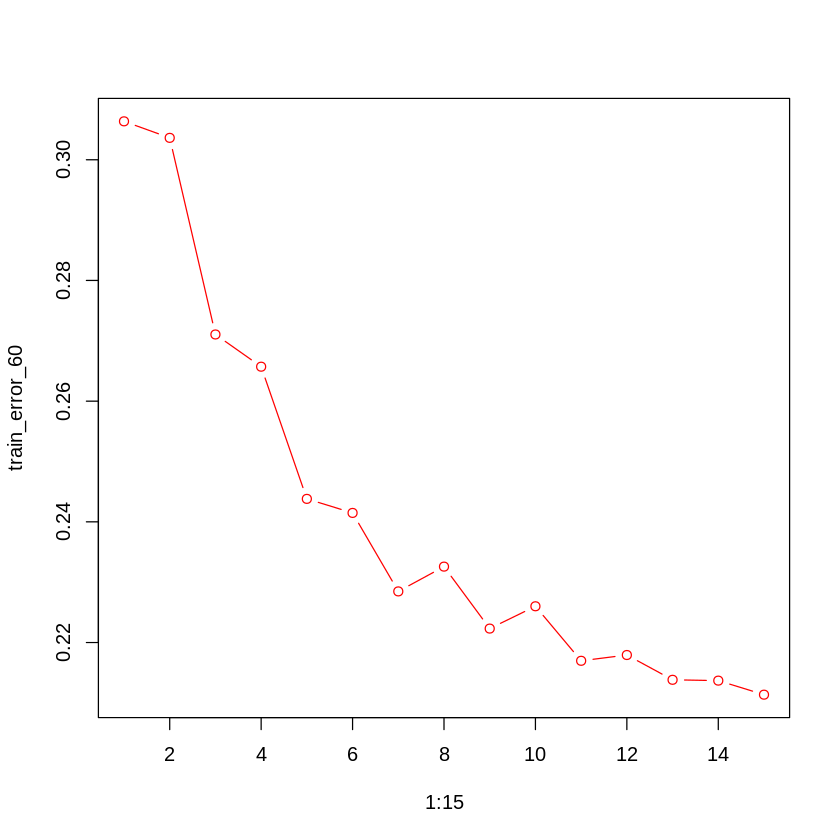

In [124]:
#::GMG::Dibujamos el resultado
plot(1:15, train_error_60, col='red', type = 'b')

In [125]:
per_error_60 <- train_error_60*100
bestk = which.min(per_error_60)
best_error_60 = min(per_error_60)

In [126]:
paste('K_opt =',bestk,'-- min error =',round(best_error_60,2),'%')

[1] "K_opt = 15 -- min error = 21.14 %"

In [127]:
#::GMG::Primer Caso: 80 --> PC1, PC2, PC3
# Hago los modelos para 15 valores de k
# https://www.rdocumentation.org/packages/class/versions/7.3-15/topics/knn.cv
train_error_80 = rep(0,15)
for(k in 1:15){
    model_knn_80 <- knn.cv(train=pca_meteo_80[indtrain, -1],  
                           cl=pca_meteo_80[indtrain,1], 
                           k=k, prob=F)
    train_error_80[k] <- mean(model_knn_80 != pca_meteo_80[indtrain,1])
}

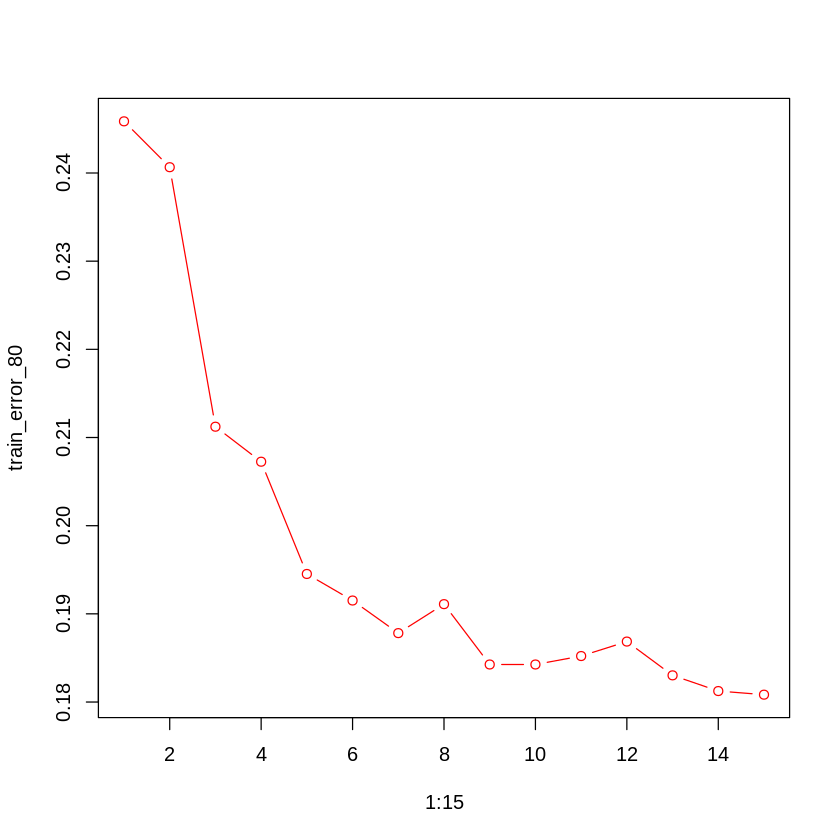

In [128]:
#::GMG::Dibujamos el resultado
plot(1:15, train_error_80, col='red', type = 'b')

In [129]:
per_error_80 <- train_error_80*100
bestk = which.min(per_error_80)
best_error_80 = min(per_error_80)

In [131]:
paste('K_opt =',bestk,'-- min error =',round(best_error_80,2),'%')

[1] "K_opt = 15 -- min error = 18.08 %"

In [132]:
#::GMG::Primer Caso: 90 --> PC1, PC2, ... PC9
# Hago los modelos para 15 valores de k
# https://www.rdocumentation.org/packages/class/versions/7.3-15/topics/knn.cv
train_error_90 = rep(0,15)
for(k in 1:15){
    model_knn_90 <- knn.cv(train=pca_meteo_90[indtrain, -1],  
                           cl=pca_meteo_90[indtrain,1], 
                           k=k, prob=F)
    train_error_90[k] <- mean(model_knn_90 != pca_meteo_90[indtrain,1])
}

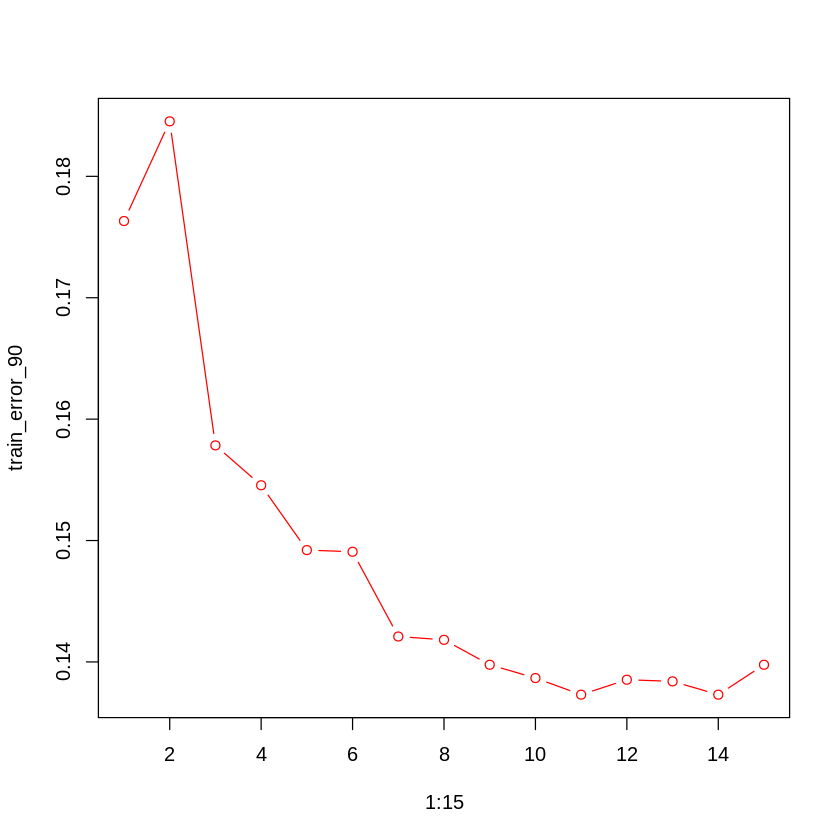

In [133]:
#::GMG::Dibujamos el resultado
plot(1:15, train_error_90, col='red', type = 'b')

In [134]:
per_error_90 <- train_error_90*100
bestk = which.min(per_error_90)
best_error_90 = min(per_error_90)

In [135]:
paste('K_opt =',bestk,'-- min error =',round(best_error_90,2),'%')

[1] "K_opt = 11 -- min error = 13.73 %"

* Para la configuración óptima calibrada con el conjunto de entrenamiento realizad la predicción sobre el conjunto de test y estimad los errores cometidos sobre este conjunto.

In [137]:
#::GMG::Caso 60
# https://www.rdocumentation.org/packages/class/versions/7.3-15/topics/knn
knn_pred_60 <- knn(train=as.matrix(pca_meteo_60[indtrain, -1]), 
                   test=as.matrix(pca_meteo_60[indtest, -1]), 
                   cl= as.matrix(pca_meteo_60[indtrain, 1]), 
                   k=15, prob=F)
#::GMG::Matriz de confusión
cm_60 <- table(knn_pred_60,as.matrix(pca_meteo_60[indtest, 1]))
print(cm_60)

           
knn_pred_60    0    1
          0 2860  737
          1   39   17


In [143]:
#::GMG::El error que obtenemos es ligeramente mayor que el de entrenamiento
paste('Error: ', round(100*sum(diag(cm_60[nrow(cm_60):1,]))/sum(cm_60),2))

[1] "Error:  21.24"

In [145]:
#::GMG::Caso 80
knn_pred_80 <- knn(train=pca_meteo_80[indtrain, -1], 
                   test=pca_meteo_80[indtest, -1], 
                   cl= as.matrix(pca_meteo_80[indtrain, 1]), 
                   k=15, prob=F)
#::GMG::Matriz de confusión
cm_80 <- table(knn_pred_80,as.matrix(pca_meteo_80[indtest, 1]))
print(cm_80)

           
knn_pred_80    0    1
          0 2733  521
          1  166  233


In [146]:
#::GMG::El error que obtenemos es ligeramente mayor que el de entrenamiento
paste('Error: ', round(100*sum(diag(cm_80[nrow(cm_80):1,]))/sum(cm_80),2))

[1] "Error:  18.81"

In [147]:
#::GMG::Caso 90
knn_pred_90 <- knn(train=pca_meteo_90[indtrain, -1], 
                   test=pca_meteo_90[indtest, -1], 
                   cl= as.matrix(pca_meteo_90[indtrain, 1]), 
                   k=11, prob=F)
#::GMG::Matriz de confusión
cm_90 <- table(knn_pred_90,as.matrix(pca_meteo_90[indtest, 1]))
print(cm_90)

           
knn_pred_90    0    1
          0 2763  417
          1  136  337


In [148]:
#::GMG::El error que obtenemos es "mayor" que el de entrenamiento
paste('Error: ', round(100*sum(diag(cm_90[nrow(cm_90):1,]))/sum(cm_90),2))

[1] "Error:  15.14"

**::GMG::** Al aumentar la información añadiendo PCs en el espacio transformado se ha mejorado el error de clasificación en el conjunto de train pero luego en el onjunto de test el error de clasificación que se obtiene es *superior* en todos los casos, especialmente en el caso de 90% de la varianza explicada.

**::DUDA::** ¿Overfitting or imbalanced Dataset?


   0    1 
8733 2225 

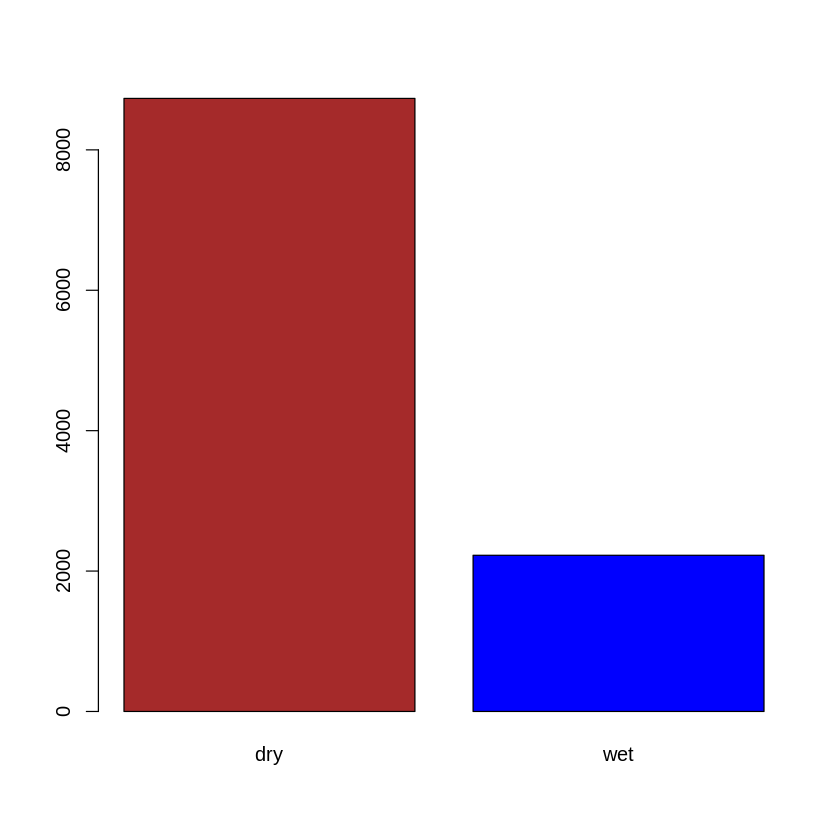

In [144]:
#::GMG::Proporción de clases en el dataset
table(pca_meteo_60$precip_f)
barplot(height = table(pca_meteo_60$precip_f),
        col = c('brown','blue'),
        names.arg = c('dry','wet'))

## Punto 3 (2 puntos):

Repetid el experimento anterior considerando la precipitación discretizada a partir del valor 20 mm, que es el estándar definido para establecer los días en que ha llovido de forma intensa.

### Ocurrencia de precipitación intensa

In [5]:
#::GMG::Selecciono la serie de preciptaciones diarias
precip <- meteo$y
str(precip)

 num [1:10958] 10.9 0.6 13 0 0 1.2 1.1 0 0 0.7 ...


In [8]:
#::GMG::Calculo la ocurrencia de precipitación
#       binary occurrence as factor (discretizo + 'categorizo')
precip_intensa_f <- as.factor(ifelse(precip >= 20, 1, 0))
str(precip_intensa_f)

 Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


**::GMG::** Hay que hacer notar que los eventos de *precipitación intensa* (>= 20 mm) apenas represntan el 2,55% del dataset ahora. Tenemos un *imbalanced dataset* de libro.

### Train/Test

In [10]:
#::GMG::Hayamos índices de train/test con 2/3 y 1/3, respectivamente
set.seed(1)
indtrain = sample(1:length(precip), round(length(precip)*2/3))  
indtest = setdiff(1:length(precip), indtrain)

### PCA estandarizado

In [11]:
#::GMG::Calculo las PCAs con estandarizado y las características X_i (sin y)
X_i <- meteo[,-1]
pca_x_scaled <- prcomp(X_i, center = TRUE, scale. = TRUE)

### Umbrales

In [12]:
var_exp <- 100*cumsum(pca_x_scaled$sdev^2)/sum(pca_x_scaled$sdev^2)

In [13]:
#::GMG::Porcentaje de la varianza explicada por PC1
paste('La PC1 explica el', round(var_exp[1],2), '% de la varianza.')

[1] "La PC1 explica el 58.23 % de la varianza."

In [14]:
#::GMG::Calculo los umbrales
umbrales <- c(max(which(var_exp <= 60)),
              max(which(var_exp <= 80)),
              max(which(var_exp <= 90)))

In [15]:
paste('El número de PCs que explican el 60% de la varanza es ', umbrales[1])

[1] "El número de PCs que explican el 60% de la varanza es  1"

In [16]:
paste('El número de PCs que explican el 80% de la varanza es ', umbrales[2])

[1] "El número de PCs que explican el 80% de la varanza es  3"

In [17]:
paste('El número de PCs que explican el 90% de la varanza es ', umbrales[3])

[1] "El número de PCs que explican el 90% de la varanza es  9"

### Datasets

In [18]:
#::GMG::Monto el dataset de ocurrencia para cada caso
X_60 <- pca_x_scaled$x[,1]
X_80 <- pca_x_scaled$x[,c(1,2)]
X_90 <- pca_x_scaled$x[,1:9]

pca_meteo_60 <- data.frame(precip_intensa_f = precip_intensa_f, PC1 = X_60)
pca_meteo_80 <- data.frame(precip_intensa_f, X_80)
pca_meteo_90 <- data.frame(precip_intensa_f, X_90)

### KNN

In [19]:
library(class)

In [20]:
set.seed(1)

#### Train

In [21]:
#::GMG::Primer Caso: 60 --> PC1
# Hago los modelos para 15 valores de k
# https://www.rdocumentation.org/packages/class/versions/7.3-15/topics/knn.cv
train_error_60 = rep(0,15)
for(k in 1:15){
    model_knn_60 <- knn.cv(train=as.matrix(pca_meteo_60[indtrain, -1]),  
                           cl=pca_meteo_60[indtrain,1], 
                           k=k, prob=F)
    train_error_60[k] <- mean(model_knn_60 != pca_meteo_60[indtrain,1])
}

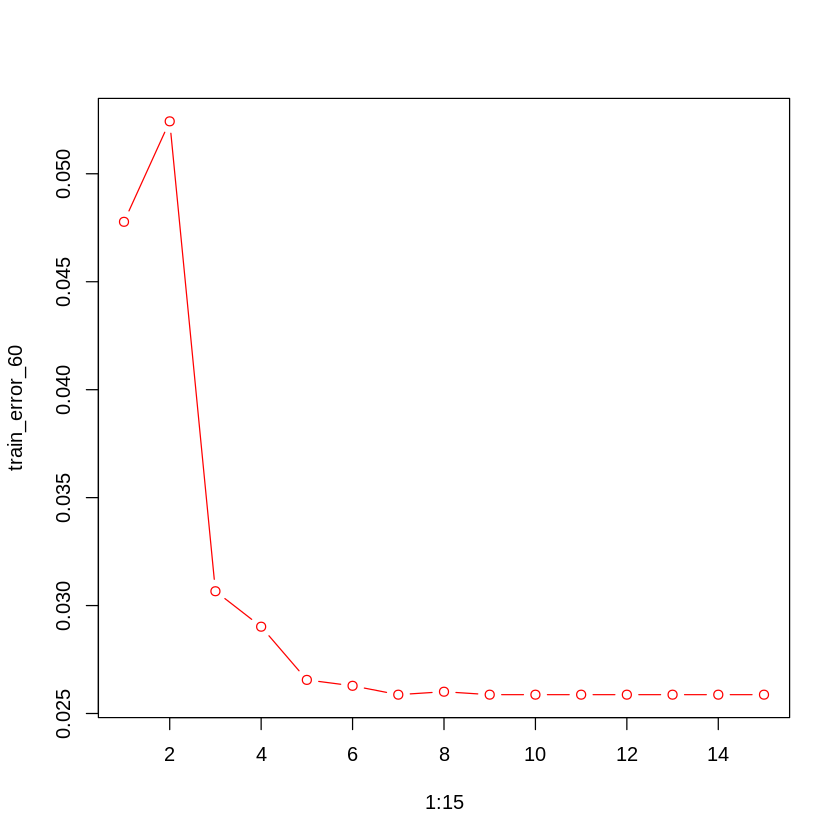

In [22]:
#::GMG::Dibujamos el resultado
plot(1:15, train_error_60, col='red', type = 'b')

In [33]:
per_error_60 <- train_error_60*100
bestk_60 = which.min(per_error_60)
best_error_60 = min(per_error_60)

In [34]:
paste('K_opt =',bestk_60,'-- min error =',round(best_error_60,2),'%')

[1] "K_opt = 7 -- min error = 2.59 %"

In [25]:
#::GMG::Primer Caso: 80 --> PC1, PC2, PC3
# Hago los modelos para 15 valores de k
# https://www.rdocumentation.org/packages/class/versions/7.3-15/topics/knn.cv
train_error_80 = rep(0,15)
for(k in 1:15){
    model_knn_80 <- knn.cv(train=pca_meteo_80[indtrain, -1],  
                           cl=pca_meteo_80[indtrain,1], 
                           k=k, prob=F)
    train_error_80[k] <- mean(model_knn_80 != pca_meteo_80[indtrain,1])
}

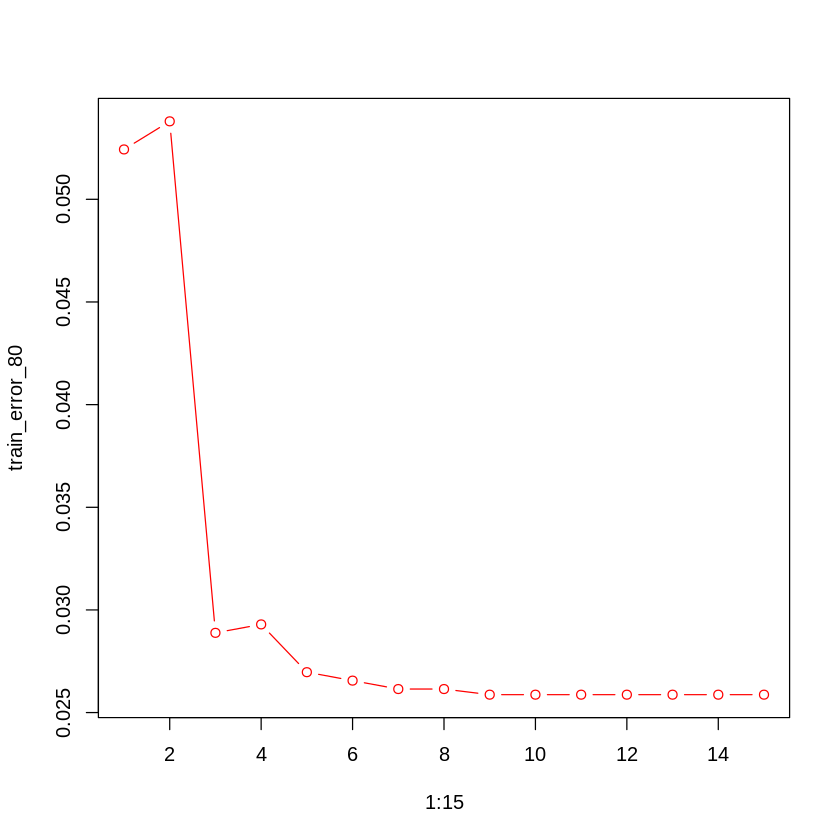

In [26]:
#::GMG::Dibujamos el resultado
plot(1:15, train_error_80, col='red', type = 'b')

In [35]:
per_error_80 <- train_error_80*100
bestk_80 = which.min(per_error_80)
best_error_80 = min(per_error_80)

In [36]:
paste('K_opt =',bestk_80,'-- min error =',round(best_error_80,2),'%')

[1] "K_opt = 9 -- min error = 2.59 %"

In [29]:
#::GMG::Primer Caso: 90 --> PC1, PC2, ... PC9
# Hago los modelos para 15 valores de k
# https://www.rdocumentation.org/packages/class/versions/7.3-15/topics/knn.cv
train_error_90 = rep(0,15)
for(k in 1:15){
    model_knn_90 <- knn.cv(train=pca_meteo_90[indtrain, -1],  
                           cl=pca_meteo_90[indtrain,1], 
                           k=k, prob=F)
    train_error_90[k] <- mean(model_knn_90 != pca_meteo_90[indtrain,1])
}

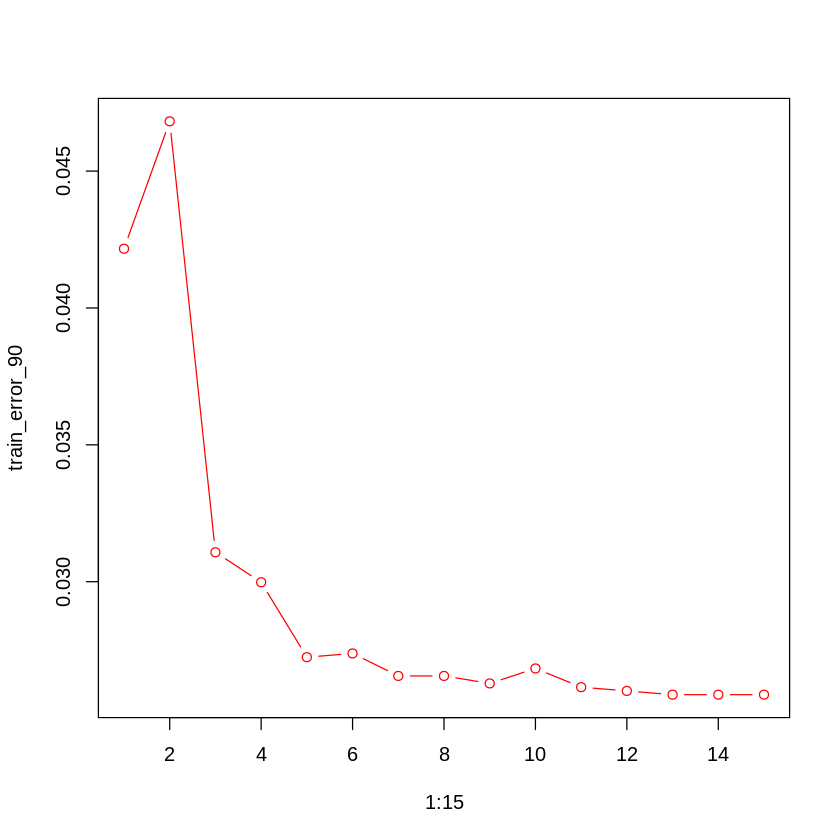

In [30]:
#::GMG::Dibujamos el resultado
plot(1:15, train_error_90, col='red', type = 'b')

In [37]:
per_error_90 <- train_error_90*100
bestk_90 = which.min(per_error_90)
best_error_90 = min(per_error_90)

In [38]:
paste('K_opt =',bestk_90,'-- min error =',round(best_error_90,2),'%')

[1] "K_opt = 13 -- min error = 2.59 %"

#### Test

In [39]:
#::GMG::Caso 60
# https://www.rdocumentation.org/packages/class/versions/7.3-15/topics/knn
knn_pred_60 <- knn(train=as.matrix(pca_meteo_60[indtrain, -1]), 
                   test=as.matrix(pca_meteo_60[indtest, -1]), 
                   cl= as.matrix(pca_meteo_60[indtrain, 1]), 
                   k=bestk_60, prob=F)
#::GMG::Matriz de confusión
cm_60 <- table(knn_pred_60,as.matrix(pca_meteo_60[indtest, 1]))
print(cm_60)

           
knn_pred_60    0    1
          0 3562   91
          1    0    0


In [40]:
#::GMG::El error que obtenemos es ligeramente mayor que el de entrenamiento
paste('Error: ', round(100*sum(diag(cm_60[nrow(cm_60):1,]))/sum(cm_60),2))

[1] "Error:  2.49"

In [41]:
#::GMG::Caso 80
knn_pred_80 <- knn(train=pca_meteo_80[indtrain, -1], 
                   test=pca_meteo_80[indtest, -1], 
                   cl= as.matrix(pca_meteo_80[indtrain, 1]), 
                   k=bestk_80, prob=F)
#::GMG::Matriz de confusión
cm_80 <- table(knn_pred_80,as.matrix(pca_meteo_80[indtest, 1]))
print(cm_80)

           
knn_pred_80    0    1
          0 3562   91
          1    0    0


In [42]:
#::GMG::El error que obtenemos es ligeramente mayor que el de entrenamiento
paste('Error: ', round(100*sum(diag(cm_80[nrow(cm_80):1,]))/sum(cm_80),2))

[1] "Error:  2.49"

In [43]:
#::GMG::Caso 90
knn_pred_90 <- knn(train=pca_meteo_90[indtrain, -1], 
                   test=pca_meteo_90[indtest, -1], 
                   cl= as.matrix(pca_meteo_90[indtrain, 1]), 
                   k=bestk_90, prob=F)
#::GMG::Matriz de confusión
cm_90 <- table(knn_pred_90,as.matrix(pca_meteo_90[indtest, 1]))
print(cm_90)

           
knn_pred_90    0    1
          0 3562   91
          1    0    0


In [44]:
#::GMG::El error que obtenemos es "mayor" que el de entrenamiento
paste('Error: ', round(100*sum(diag(cm_90[nrow(cm_90):1,]))/sum(cm_90),2))

[1] "Error:  2.49"

* ¿Cómo cambian los valores óptimos de `K` y de número de PCs? 

**::GMG**:: Los PCs para cada umbral seleccionado *son los mismos* en ambos casos por que he aplicado el método no supervisado de PCA escalado a las mismas *features*. Los valores de K óptimos en el caso de precipitación intensa son *inferiores* en el experimento de precipitación intensa respecto al caso anterior *excepto* para el caso de 90% de varianza explicada donde el K sale *superior* en el caso de precipitación intensa. No obstante en este caso, observando el gráfico de error, se podría haber cogido un K igual manteniendo prácticamente el error por debajo del caso de precipitación normal.

* ¿Cómo cambian los errores sobre el conjunto de test en este caso?

**::GMG::** El experimento de comprobación de los modelos entrenados en el conjunto de test en el caso de la precipitación intensa ha arrojado un resultado curioso. El modelo *no ha predicho* el caso de precipitación intensa. Solamente ha "predicho" el caso de no precipiatción intensa. El error calculado no es relevante en este caso ya que *no tiene sentido* a la vista del hecho anterior. Intuyo que esto que se ha producido es debido a la *pobre reprsentación* del evento extremo en el dataset. Supongo que para poder hacer este exeprimento bien hay que tratar primero el problema del "imbalanced dataset".

precip_intensa_f
    0     1 
10678   280 

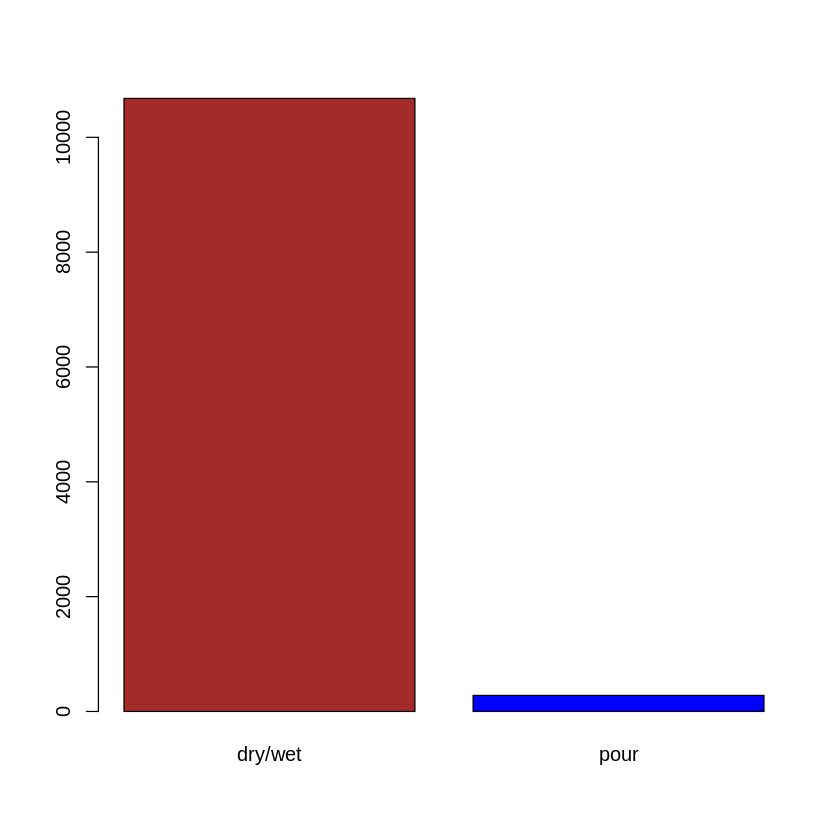

In [9]:
#::GMG::Proporción de clases en el dataset
table(precip_intensa_f)
barplot(height = table(precip_intensa_f),
        col = c('brown','blue'),
        names.arg = c('dry/wet','pour'))

* En caso de existir diferentes significativas en ambos casos, ¿a qué crees que puede ser debido? ¿La frecuencia en la muestra del evento a predecir puede influir en la calidad de la predicción?

**::GMG::** Ya he contestado en el apartado anterior anterior :)

## Punto 4 (2 puntos):

Considerando el número de PCs óptimo obtenido en el apartado anterior, predecid el conjunto de test utilizando en este caso la regresión logística como método de clasificación (`Nota:` ver `Práctica Clasificacion Lineal` en el Moodle de la asignatura de Estadística o en la de Minería de Datos). 

* Comparad los resultados obtenidos utilizando ambos métodos para la predicción de la ocurrencia de precipitación y de precipitación intensa (`Nota:` considerar, por ejemplo, la curva ROC para la comparación), ¿alguno de los métodos se comporta mejor que el otro de forma sistemática?